In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget
%pylab inline

import os
import sys
import cv2

sys.path.append('..')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datajoint as dj

# if using testing database
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'pose'

Connecting root@127.0.0.1:3306


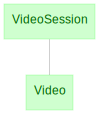

In [3]:
from PosePipeline.pipeline import VideoSession, Video

#Video.drop()

dj.ERD(dj.schema('pose_pipeline'))

In [ ]:
session_id = 0

#VideoSession.insert1({'session_id': session_id, 'date': '2021-03-03', 'irb': 'test'})

#test_file = '/home/jcotton/projects/pose/PeoplePerception/test_videos/20210303-140123Z_results.mp4'
test_file = '/home/jcotton/projects/pose/PeoplePerception/test_videos/20210303-140123Z.mp4'
Video.insert1(Video.make_entry(test_file, session_id=1))

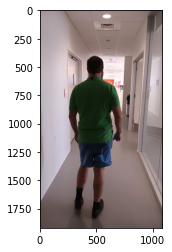

In [7]:
from PIL import Image
import cv2

d = Video().fetch1()
cap = cv2.VideoCapture(d['video'])

ret, frame = cap.read()

cap.release()
os.remove(d['video'])

plt.imshow(frame[..., ::-1])